### Problem Statement

We all know that when we visit an e-commerce or TV series website or even YouTube we see a separate suggestion box, where in they show some content which you might like. These are mainly based on the content that you have consumed on their website previously. These are called as Recommendation engine. 

Now consider you have been running a start up since last one year and now you have been able to gather some customer data and you want to build a recommendation engine. Based on certain features you have to cluster the customers into two different groups so that you can recommend the correct products based on the customer’s cluster.

### Data Description:

##### customer_visit_score ==> a score based on how regularly the customer visits the website
##### customer_product_search_score ==> quality or price range of product that the customer searches for.
For ex: a customer searching for a laptop will have more weightage than someone looking for a book
##### customer_ctr_score ==> how many of the searched links does the customer click
##### customer_stay_score ==> a score based on the time spent on an avg. by the customer
##### customer_frequency_score ==> a score based on how many times in a day the customer visit the website
##### customer_product_variation_score ==> a score based on how many varities of products does a customer search 
For ex. electronics, apparels, etc.
##### customer_order_score ==> Score based on the no. of orders that has been succesfully delivered and not returned
##### customer_affinity_score ==> an internal overall score calculated which signifies the affinity of the customer towards the website
##### customer_category ==> the cluster/group to which the customer should belong to
##### customer_active_segment ==> the categorization of the customers based on their activity
##### X_1 ==> Anonymized feature based on loyalty of the customer


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed

### Reading the Datasets

In [2]:
data = pd.read_csv('train.csv', index_col='customer_id')

In [3]:
data.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
customer_id,,,,,,,,,,,
csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [4]:
print(data.shape,'\n')
print(data.info())

(10738, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, csid_1 to csid_10738
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_visit_score              10738 non-null  float64
 1   customer_product_search_score     10696 non-null  float64
 2   customer_ctr_score                10738 non-null  float64
 3   customer_stay_score               10701 non-null  float64
 4   customer_frequency_score          10738 non-null  float64
 5   customer_product_variation_score  10692 non-null  float64
 6   customer_order_score              10672 non-null  float64
 7   customer_affinity_score           10738 non-null  float64
 8   customer_active_segment           10715 non-null  object 
 9   X1                                10701 non-null  object 
 10  customer_category                 10738 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage:

In [5]:
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [6]:
test_data = pd.read_csv("test.csv", index_col='customer_id')

In [7]:
test_data.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
customer_id,,,,,,,,,,
csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [8]:
print(test_data.shape,'\n')
print(test_data.info())

(7160, 10) 

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, csid_10739 to csid_17898
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_visit_score              7160 non-null   float64
 1   customer_product_search_score     7131 non-null   float64
 2   customer_ctr_score                7160 non-null   float64
 3   customer_stay_score               7144 non-null   float64
 4   customer_frequency_score          7160 non-null   float64
 5   customer_product_variation_score  7117 non-null   float64
 6   customer_order_score              7119 non-null   float64
 7   customer_affinity_score           7160 non-null   float64
 8   customer_active_segment           7148 non-null   object 
 9   X1                                7135 non-null   object 
dtypes: float64(8), object(2)
memory usage: 615.3+ KB
None


In [9]:
test_data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [10]:
data.nunique()

customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment                 5
X1                                      5
customer_category                       2
dtype: int64

In [29]:
data1 = data[['customer_active_segment','customer_category']]

In [30]:
data1

,customer_active_segment,customer_category
customer_id,,
csid_1,C,0
csid_2,C,0
csid_3,C,0
csid_4,AA,0
csid_5,C,0
...,...,...
csid_10734,C,0
csid_10735,C,0
csid_10736,A,0


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')

In [33]:
X = data1

In [37]:
X = X.dropna

In [38]:
enc.fit(X)

ValueError: Expected 2D array, got scalar array instead:
array=<bound method DataFrame.dropna of             customer_active_segment  customer_category
customer_id                                           
csid_1                            C                  0
csid_2                            C                  0
csid_3                            C                  0
csid_4                           AA                  0
csid_5                            C                  0
...                             ...                ...
csid_10734                        C                  0
csid_10735                        C                  0
csid_10736                        A                  0
csid_10737                        B                  0
csid_10738                        B                  0

[10738 rows x 2 columns]>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
data.isna().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [12]:
test_data.isna().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

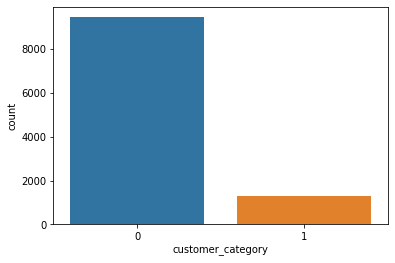

0    9443
1    1295
Name: customer_category, dtype: int64
Percentage of prediction: 12.059973924380705 %


In [13]:
sns.countplot(x='customer_category',data=data)
plt.show()

print(data.customer_category.value_counts())

count_1 = len(data[data.customer_category == 1])
count_0 = len(data[data.customer_category == 0])

percent_success = (count_1/(count_1 + count_0))*100

print('Percentage of prediction:', percent_success, "%")

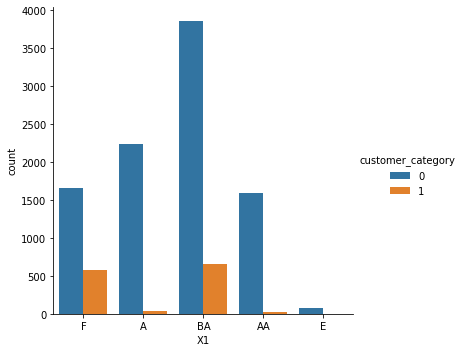

In [14]:
sns.factorplot('X1',data = data, hue = 'customer_category',kind = 'count')

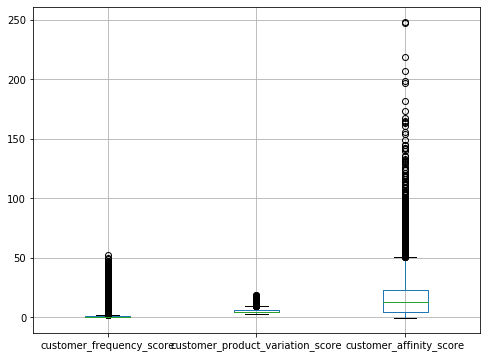

In [15]:
box = data.boxplot(column=['customer_frequency_score', 'customer_product_variation_score', 'customer_affinity_score'], figsize=(8,6))

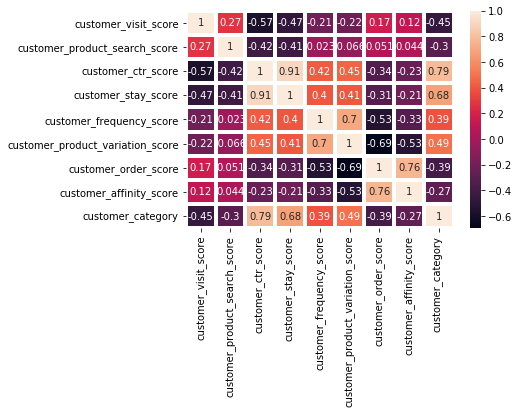

In [16]:
correlaton = data.corr()
sns.heatmap(correlaton, annot=True, linewidth=3)

corr_matrix = data.corr()
corr_matrix["customer_category"].sort_values(ascending=False)

In [17]:
drop_list = ['customer_stay_score','X1']

In [18]:
data.drop(drop_list, axis=1, inplace=True)
test_data.drop(drop_list, axis=1, inplace=True)

print(data.shape)
print(test_data.shape)

(10738, 9)
(7160, 8)


In [19]:
data.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
customer_category                     int64
dtype: object

In [20]:
cat_attr = list(data.select_dtypes("object").columns)
num_attr = list(data.columns.difference(cat_attr))

print(cat_attr,'\n')
print(num_attr)

['customer_active_segment'] 

['customer_affinity_score', 'customer_category', 'customer_ctr_score', 'customer_frequency_score', 'customer_order_score', 'customer_product_search_score', 'customer_product_variation_score', 'customer_visit_score']


In [21]:
num_attr.pop(1)

'customer_category'

data = pd.get_dummies(data)

sd = MinMaxScaler()

data = pd.DataFrame(sd.fit_transform(data), columns=data.columns)

In [22]:
for i in cat_attr:
    data[i] = data[i].astype("category")

testdata_cat_attr = list(test_data.select_dtypes("object").columns)
testdata_num_attr = list(test_data.columns.difference(cat_attr))

print(testdata_cat_attr,'\n')
print(testdata_num_attr)

for i in testdata_cat_attr:
    test_data[i] = test_data[i].astype("category")

In [25]:
cat_attr

['customer_active_segment']

In [28]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, data['customer_active_segment'])])

In [31]:
df = data.copy()

In [29]:
data

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,customer_category
customer_id,,,,,,,,,
csid_1,13.168425,9.447662,-0.070203,0.436956,4.705761,2.537985,7.959503,C,0
csid_2,17.092979,7.329056,0.153298,0.380340,4.205138,4.193444,17.517381,C,0
csid_3,17.505334,5.143676,0.106709,0.417648,4.479070,3.878971,12.595155,C,0
csid_4,31.423381,4.917740,-0.020226,0.778130,5.055535,2.708940,4.795073,AA,0
csid_5,11.909502,4.237073,0.187178,0.162067,3.445247,3.677360,56.636326,C,0
...,...,...,...,...,...,...,...,...,...
csid_10734,23.672615,6.701514,0.092879,1.210397,7.003663,3.027084,1.952911,C,0
csid_10735,25.673028,6.497796,0.050216,0.725230,5.407507,3.104172,5.124286,C,0
csid_10736,31.676844,7.799880,0.062961,0.318118,5.598486,2.403051,21.864188,A,0


In [24]:
X = data.drop('customer_category',axis=1)
Y = data.customer_category

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [25]:
print(x_train.shape)
print(y_train.shape,'\n')

print(x_test.shape)
print(y_test.shape)

(7516, 8)
(7516,) 

(3222, 8)
(3222,)


#### DecisionTree

In [26]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 931
Before OverSampling, counts of label '0': 6585 



ValueError: could not convert string to float: 'B'

In [ ]:
print(x_train.shape)
print(X_train_res.shape)
print(x_test.shape)

In [ ]:
#DecisionTree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
DecisionTree = DecisionTreeClassifier()

In [ ]:
DecisionTree.fit(X_train_res,y_train_res)

In [ ]:
DT_train_pred = DecisionTree.predict(X_train_res)
DT_test_pred = DecisionTree.predict(x_test)

In [ ]:
print(precision_score(y_train_res, DT_train_pred, average='macro'))
print(precision_score(y_test, DT_test_pred, average='macro'))

In [ ]:
DecisionTree.feature_importances_

In [ ]:
importances = DecisionTree.feature_importances_
indices = np.argsort(importances)
print(indices)

In [ ]:
features = x_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='orange')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Logistc Regression

In [ ]:
#Log_Reg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_res,y_train_res)

In [ ]:
Log_train_pred = lr.predict(X_train_res)
Log_test_pred = lr.predict(x_test)

In [ ]:
print(precision_score(y_train_res, Log_train_pred, average='macro'))
print(precision_score(y_test, Log_test_pred, average='macro'))

In [ ]:
test_data_pred = Log_Reg.predict(test_data)

In [ ]:
df  = pd.read_csv("test.csv")

In [ ]:
DF = pd.DataFrame(list(zip(df['customer_id'],test_data_pred)),columns=['customer_id','customer_category'])
DF.to_csv("Log.csv",index=False)
DF.shape